# Part II -  Ford GoBike System Data Visualizations.
## by Oluwaseyi Aderemi

## Investigation Overview

> These are the Insights I would focus on in the presentation:  
>
> * Majority of the users of this service are the male gender, with aproximately 75% of the population serviced. They tend to use the bikes to travel longer distances and also use them for longer.
> * Users are mostly between ages 20 and 50. and they tend to use the bikes for not more than 3 km at a go. Younger people seem to travel longer distances and older people travel shorter distances.


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data was collected from e-bikes used over a period of time. There are 16 columns provided, below are some that were of interest:  
>
>* `duration_sec` - This the amount of time that the bike is used, measured in seconds.
>* ``start_time`` - This is the timestamp that shows when the session began.
>* ``end_time`` - This is the timestamp that shows when the session ended.
>* ``start_station_latitude`` - As the name implies.
>* ``start_station_longitude`` - As the name implies.
>* ``end_station_latitude`` - As the name implies.
>* ``end_station_longitude``  - As the name implies.
>* ``bike_id`` - This is the unique identification given to each bike.
>* ``user_type`` - states whether the user is a customer or subscriber.
>* ``member_birth_year`` - The year the user was born.
>* ``member_gender`` - The gender of the user.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from functions import *
%matplotlib inline

sb.set_style('whitegrid')
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# Increasing the font size for the visualizations.
font = {'family' : 'roboto',
        'weight' : 'regular',
        'size'   : 14}

matplotlib.rc('font', **font)

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("df_clean.csv")

## Population Distrubution by Gender.

> The donut plot shows how the population is distributed across the genders and can see that the males take up approximately 75% of the total users, folllowed by the females with 23% and other genders with 2%.

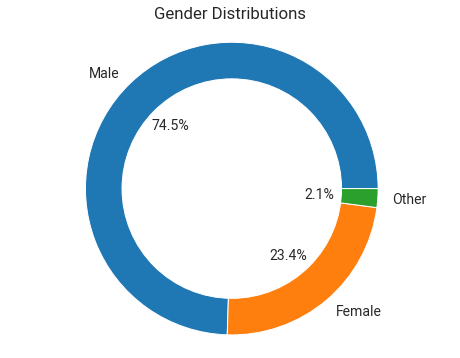

In [3]:
# Visualization
data = df.member_gender.value_counts()
univ_plot('donut', data, labels = data.index, figsize=(8,6), title = "Gender Distributions")

## What gender actually travels the farthest and longest per trip?
We see a histogram that shows the distance travelled by a user and the time it takes them to complete their trip. We can see that the number of points above and to the right of the main cluster is higher among the males.   
I also made a bar chart to convey this message further, it shows the number of trips with distance and duration values above the mean.

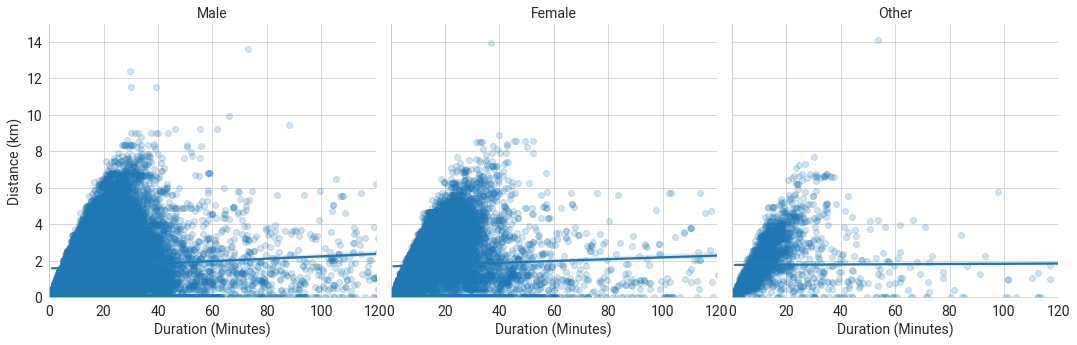

In [4]:
g = sb.FacetGrid(data = df, col = 'member_gender', col_order = ['Male', 'Female', 'Other'], height = 5)
g.map(sb.regplot, 'duration_min', 'distance', fit_reg = True, scatter_kws = {'alpha': 1/5});
g.set(ylim = (0, 15), xlim = (0, 120), xlabel = 'Duration (Minutes)', ylabel = 'Distance (km)');
g.set_titles('{col_name}');

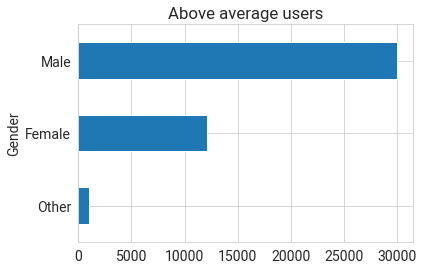

In [5]:
mean_distance = df.distance.mean()
mean_duration = df.duration_min.mean()
data = df.query(f"distance > {mean_distance} and duration_min > {mean_duration}")
data = data.member_gender.value_counts().sort_values(ascending = True)
data.plot(kind = 'barh', color = sb.color_palette()[0], title = 'Above average users', ylabel = 'Number of Users', xlabel = 'Gender');

## 3. How does a users age affect the distance that they travel?
We can see from the heatmap, that as age increases, the distance travelled by users decreases and vice versa.  
Also, the bulk of the users are within the ages of 25 to 35 and travel less mostly small distances (0.5 to 2 km)


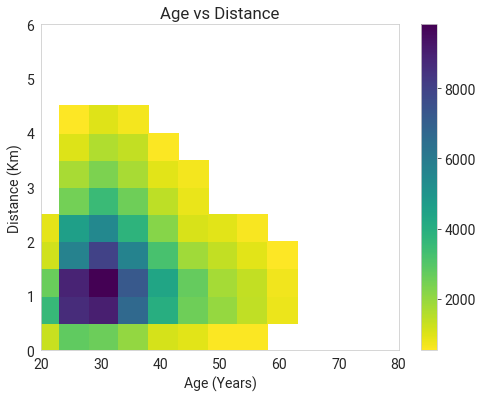

In [6]:
# Age vs distance
bin_x = bin_gen(df.member_age, 5)
bin_y = bin_gen(df.distance, 0.5)
bins = [bin_x, bin_y]
bi_plot('heat', df, 'member_age', 'distance', bins = [bin_x, bin_y], figsize = (8, 6), title = 'Age vs Distance', xlabel = 'Age (Years)', ylabel = 'Distance (Km)');
plt.xlim(20, 80);
plt.ylim(0, 6);


In [10]:
!jupyter nbconvert visualizations.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook visualizations.ipynb to slides
[NbConvertApp] Writing 798522 bytes to visualizations.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\envs\data\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\user\Anaconda3\envs\data\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\user\Anaconda3\envs\data\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\user\Anaconda3\envs\data\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\user\Anaconda3\envs\data